In [1]:
## From this tutorial https://www.youtube.com/watch?v=oOAnERLiN5U&t=13s

import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

In [3]:
#ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
import json
with open('../Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

In [4]:
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

<ipython-input-4-bd7ec1fdaa54>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])


In [5]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    

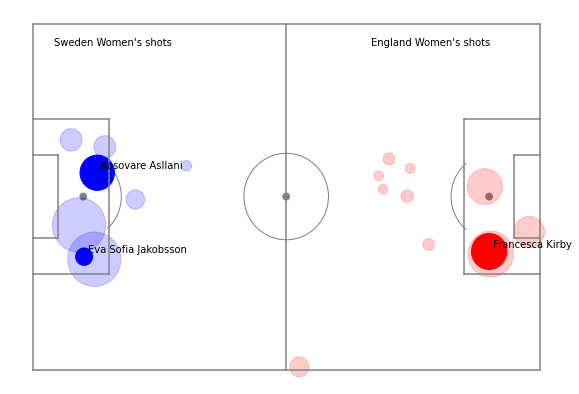

In [6]:
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    # circleSize=2
    circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
# fig.savefig('Output/shots.pdf', dpi=100)  
plt.show()

In [7]:
#Exercise 1 :  Create a dataframe of passes which contains all the passes in the match

In [8]:
df['type_name'].values

array(['Starting XI', 'Starting XI', 'Half Start', ..., 'Ball Receipt*',
       'Half End', 'Half End'], dtype=object)

In [9]:
#A dataframe of passes
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

In [10]:
passes.count()

index                       921
period                      921
timestamp                   921
minute                      921
second                      921
                           ... 
foul_committed_advantage      0
foul_won_advantage            0
foul_committed_card_id        0
foul_committed_card_name      0
match_id                    921
Length: 119, dtype: int64

In [11]:
#Exercise 2 : Plot the start point of every Sweden pass. Attacking left to right.

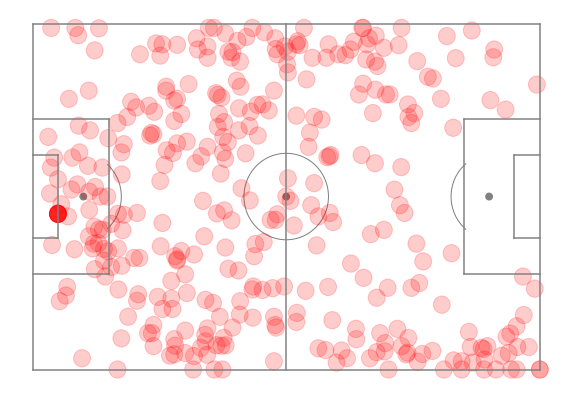

In [12]:
# Draw the pitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

# Plot every Sweden passes 
for i,pass_ in passes.iterrows():
    if pass_['team_name']=='Sweden Women\'s':
        x=pass_['location'][0]
        y=pass_['location'][1]
        
        circleSize=2
        passCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
        passCircle.set_alpha(.2)

        ax.add_patch(passCircle)
fig.set_size_inches(10, 7)
plt.show()

In [13]:
#Exercise 3 : Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)


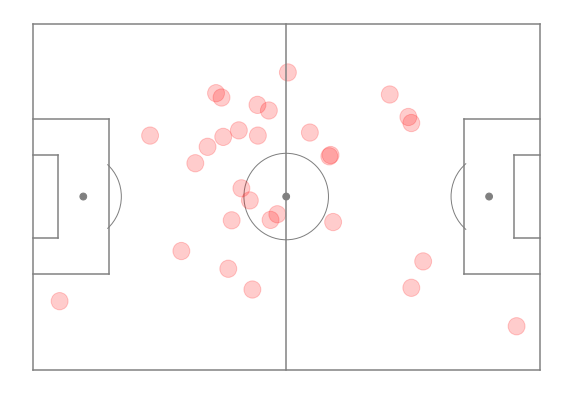

In [14]:
# Draw the pitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

for i,pass_ in passes.iterrows():
    if pass_['player_name']=='Sara Caroline Seger':
        x=pass_['location'][0]
        y=pass_['location'][1]
        
        # plot the start point of Seger pass
        circleSize=2
        passCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)

fig.set_size_inches(10, 7)
plt.show()

In [15]:
#Exercise 4 : Plot arrows to show where the passes went

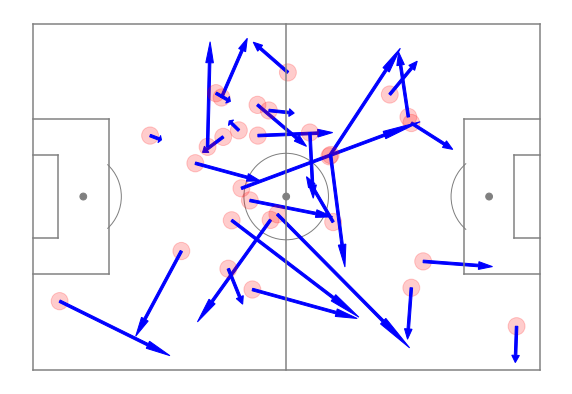

In [16]:
# Draw the pitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
 
for i,pass_ in passes.iterrows():
    if pass_['player_name']=='Sara Caroline Seger':
        x = pass_['location'][0]
        y = pass_['location'][1]
        
        # plot the start point of Seger pass
        circleSize=2
        passCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)

        # plot the arrow of Seger pass
        dx = pass_['pass_end_location'][0] - x
        dy = pass_['pass_end_location'][1] - y
        passArrow = plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)
plt.show()